### Compute structure factor for $N=100$

$$ I(k) = \sum_{i=0}^N \sum_{j=0}^N \left\langle \frac{\sin{k ||\vec{R}_i - \vec{R}_j||}}{k ||\vec{R}_i - \vec{R}_j||} \right\rangle$$

### Comparison with Guinier approximation
$$I(k) = (N + 1)^2 \left[1 - \frac{(k R_g)^2}{3} \right]$$

In [1]:
# Library for reading simulation data
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b=3.0
N=100
T=100

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for T in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[T,i]=float(coord[1])
            y[T,i]=float(coord[2])
            z[T,i]=float(coord[3])

### Matrix computation

In [2]:
# Variables declaration
step = 0.01
k = np.arange(0, 0.2, step)     # k moment range
I = np.ones(len(k)) * (N+1)     # Intensity, I(k)
# with diagonal elements already included i=j
Rg2 = b**2 * N / 6              # Radius of gyration squared
Guinier = (N + 1)**2 * (1 - k**2 * Rg2/3)    # Guinier approximation

# Structure factor calculation
for l in range(len(k)):
    for i in range(N + 1):
        for j in range(N + 1):
            if j > i:   # Only upper triangular matrix
                arg = k[l] * np.sqrt((x[:, i]-x[:, j])**2 + (y[:, i]-y[:, j])**2 + (z[:, i]-z[:, j])**2)
                I[l] += 2 * np.mean(np.sin(arg) / arg)

C:\Users\propietario\AppData\Local\Temp\ipykernel_15376\2804525873.py:15: RuntimeWarning: invalid value encountered in divide
  I[l] += 2 * np.mean(np.sin(arg) / arg)


### Plot

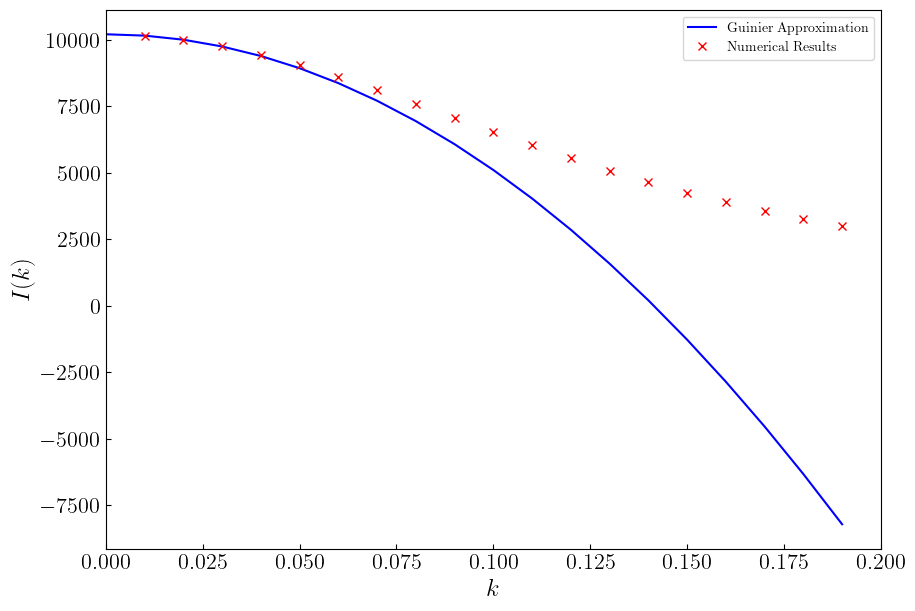

In [11]:
k = np.arange(0, 0.2, step)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,7))
plt.plot(k, Guinier, 'b-', label=r'Guinier Approximation')
plt.plot(k, I, 'rx', label=r'Numerical Results')
plt.xlim(0, 0.2)
# plt.ylim(-1.1 * (N+1)**2, 1.1 * (N+1)**2)
plt.legend()
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$I(k)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

### Plot of Guinier approximation error

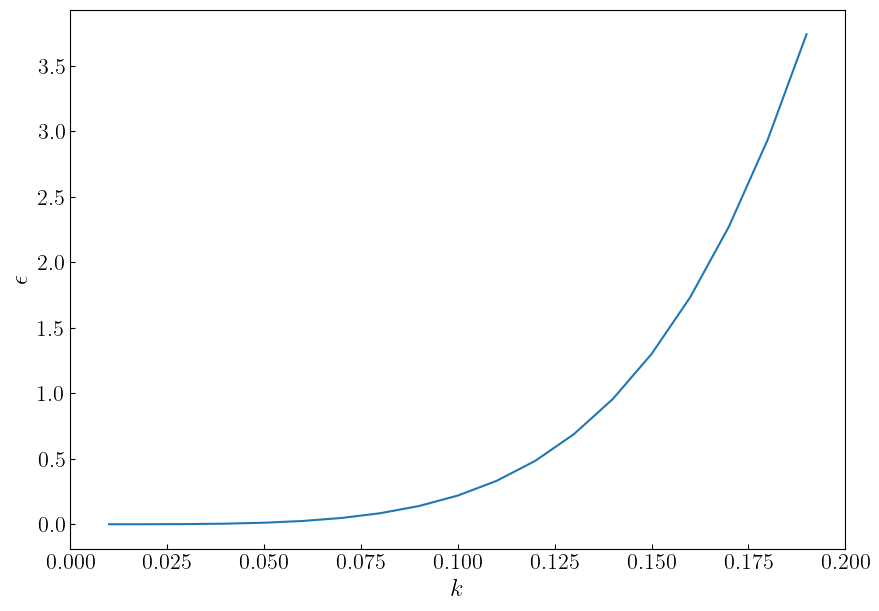

In [13]:
plt.figure(figsize=(10,7))
plt.plot(k, np.abs(Guinier - I) / np.abs(I))
plt.xlim(0, 0.2)
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$\epsilon$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()